# Determining the salary for player in FIFA 18

This dataset obtained from www.kaggle.com contains 185 fields for every player in FIFA 18:
 - Player info such as age, club, league, nationality, salary and physical attributes
 - All playing attributes, such as finishing and dribbling
 - Special attributes like skill moves and international reputation
 - Traits and specialities
 - Overall, potential, and ratings for each position
We would construct a regression model trying to predict the salary of each player. The idea covered in the textbook but not covered well in the lectures that we use is: 

Some of the columns contain special characters so we use UTF-8 encoding to read the .csv in properly. 

# Import and explore data

In [1]:
import pandas as pd
pd.options.display.max_columns = 50
df = pd.read_csv("complete.csv", encoding="utf-8")
df.head(5)

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,weight_kg,body_type,real_face,flag,nationality,photo,eur_value,eur_wage,eur_release_clause,overall,potential,pac,sho,pas,dri,...,prefers_rf,prefers_ram,prefers_rcm,prefers_rm,prefers_rdm,prefers_rcb,prefers_rb,prefers_rwb,prefers_st,prefers_lw,prefers_cf,prefers_cam,prefers_cm,prefers_lm,prefers_cdm,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,80.0,C. Ronaldo,True,https://cdn.sofifa.org/flags/38@3x.png,Portugal,https://cdn.sofifa.org/18/players/20801.png,95500000.0,565000.0,195800000.0,94,94,90,93,82,90,...,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,72.0,Messi,True,https://cdn.sofifa.org/flags/52@3x.png,Argentina,https://cdn.sofifa.org/18/players/158023.png,105000000.0,565000.0,215300000.0,93,93,89,90,86,96,...,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,68.0,Neymar,True,https://cdn.sofifa.org/flags/54@3x.png,Brazil,https://cdn.sofifa.org/18/players/190871.png,123000000.0,280000.0,236800000.0,92,94,92,84,79,95,...,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,86.0,Normal,True,https://cdn.sofifa.org/flags/60@3x.png,Uruguay,https://cdn.sofifa.org/18/players/176580.png,97000000.0,510000.0,198900000.0,92,92,82,90,79,87,...,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,92.0,Normal,True,https://cdn.sofifa.org/flags/21@3x.png,Germany,https://cdn.sofifa.org/18/players/167495.png,61000000.0,230000.0,100700000.0,92,92,91,90,95,89,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


# Observe
- The data has a lot of very detail features??? such as international reputation, work rate at attacking and defending, etc. 
- We drop columns that we think do not correlate with salary: ID, special, club_logo, flag, photo
- As goal keepers (gk) have a separate set of properties, we move them to the gk dataframe. The other player data move to data dataframe.
- There is zero salary data in dataframe. This is because of .... . We should drop these line.
- Cristiano Ronaldo, L.Messi and L. Suárez have exceptional high salary because they have several uncountable value. Therefore, I will drop these 3.
- Change work_rate from scale Low, Medium, High to scale 1,2,3
- Change boolean to scale 0,1
- In player dataframe, drop all goalkeeper skills.
(Viet lai cai nay va add them nhung cai can lam o day)

In [2]:
# Drop exceptions
# df.drop(['20801', '158023', '176580'], axis=0)

# Drop columns.
for i in {'ID','special','club_logo','flag','photo','real_face', 'prefers_gk'}:
    del df[i]

# Drop zero salary row.
df = df[df['eur_wage']!=0]

df.head(5)

,name,full_name,club,age,league,birth_date,height_cm,weight_kg,body_type,nationality,eur_value,eur_wage,eur_release_clause,overall,potential,pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,work_rate_att,...,prefers_rw,prefers_rf,prefers_ram,prefers_rcm,prefers_rm,prefers_rdm,prefers_rcb,prefers_rb,prefers_rwb,prefers_st,prefers_lw,prefers_cf,prefers_cam,prefers_cm,prefers_lm,prefers_cdm,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb
0,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,32,Spanish Primera División,1985-02-05,185.0,80.0,C. Ronaldo,Portugal,95500000.0,565000.0,195800000.0,94,94,90,93,82,90,33,80,5,5,4,High,...,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,L. Messi,Lionel Messi,FC Barcelona,30,Spanish Primera División,1987-06-24,170.0,72.0,Messi,Argentina,105000000.0,565000.0,215300000.0,93,93,89,90,86,96,26,61,5,4,4,Medium,...,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,25,French Ligue 1,1992-02-05,175.0,68.0,Neymar,Brazil,123000000.0,280000.0,236800000.0,92,94,92,84,79,95,30,60,5,5,5,High,...,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,L. Suárez,Luis Suárez,FC Barcelona,30,Spanish Primera División,1987-01-24,182.0,86.0,Normal,Uruguay,97000000.0,510000.0,198900000.0,92,92,82,90,79,87,42,81,5,4,4,High,...,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,M. Neuer,Manuel Neuer,FC Bayern Munich,31,German Bundesliga,1986-03-27,193.0,92.0,Normal,Germany,61000000.0,230000.0,100700000.0,92,92,91,90,95,89,60,91,5,1,4,Medium,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [3]:
df['work_rate_att'].replace({'High':3,'Medium':2,'Low':1},inplace = True)
df['work_rate_def'].replace({'High':3,'Medium':2,'Low':1},inplace = True)



In [4]:
start_column = df.columns.get_loc("1_on_1_rush_trait")
end_column = df.columns.get_loc("prefers_lcb") + 1
for i in range (start_column,end_column):
    a = df.iloc[:,i]
    a.replace({True:1, False:0}, inplace = True)
df

,name,full_name,club,age,league,birth_date,height_cm,weight_kg,body_type,nationality,eur_value,eur_wage,eur_release_clause,overall,potential,pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,work_rate_att,...,prefers_rw,prefers_rf,prefers_ram,prefers_rcm,prefers_rm,prefers_rdm,prefers_rcb,prefers_rb,prefers_rwb,prefers_st,prefers_lw,prefers_cf,prefers_cam,prefers_cm,prefers_lm,prefers_cdm,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb
0,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,32,Spanish Primera División,1985-02-05,185.0,80.0,C. Ronaldo,Portugal,95500000.0,565000.0,195800000.0,94,94,90,93,82,90,33,80,5,5,4,3,...,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,L. Messi,Lionel Messi,FC Barcelona,30,Spanish Primera División,1987-06-24,170.0,72.0,Messi,Argentina,105000000.0,565000.0,215300000.0,93,93,89,90,86,96,26,61,5,4,4,2,...,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,25,French Ligue 1,1992-02-05,175.0,68.0,Neymar,Brazil,123000000.0,280000.0,236800000.0,92,94,92,84,79,95,30,60,5,5,5,3,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,L. Suárez,Luis Suárez,FC Barcelona,30,Spanish Primera División,1987-01-24,182.0,86.0,Normal,Uruguay,97000000.0,510000.0,198900000.0,92,92,82,90,79,87,42,81,5,4,4,3,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,M. Neuer,Manuel Neuer,FC Bayern Munich,31,German Bundesliga,1986-03-27,193.0,92.0,Normal,Germany,61000000.0,230000.0,100700000.0,92,92,91,90,95,89,60,91,5,1,4,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,R. Lewandowski,Robert Lewandowski,FC Bayern Munich,28,German Bundesliga,1988-08-21,185.0,79.0,Normal,Poland,92000000.0,355000.0,151800000.0,91,91,81,88,75,86,38,82,4,3,4,3,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,De Gea,David De Gea Quintana,Manchester United,26,English Premier League,1990-11-07,193.0,76.0,Lean,Spain,64500000.0,215000.0,124200000.0,90,92,90,85,87,90,58,86,4,1,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,E. Hazard,Eden Hazard,Chelsea,26,English Premier League,1991-01-07,173.0,76.0,Normal,Belgium,90500000.0,295000.0,174200000.0,90,91,90,82,84,92,32,66,4,4,4,3,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,T. Kroos,Toni Kroos,Real Madrid CF,27,Spanish Primera División,1990-01-04,182.0,78.0,Normal,Germany,79000000.0,340000.0,162000000.0,90,90,56,81,89,81,73,70,4,3,5,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
9,G. Higuaín,Gonzalo Higuaín,Juventus,29,Italian Serie A,1987-12-10,184.0,87.0,Normal,Argentina,77000000.0,275000.0,127100000.0,90,90,79,87,70,83,25,74,4,3,4,3,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
# Put gk data to gk dataframe.
gk = df[df['gk'].notnull()]

# And drop all the null columns (properties not correlated with a goal keeper salary) in gk.
rs_column = gk.columns.get_loc("rs")
lcb_column = gk.columns.get_loc("lcb") + 1
gk = gk.drop(gk.columns[rs_column:lcb_column],axis=1)

# Finally, we drop the gk column in the df dataframe as not gk players do not have this property.
data = df.drop('gk',axis =1 )
data = df.drop(['gk_diving','gk_handling','gk_kicking','gk_positioning', 'gk_reflexes'],axis =1)
data.dropna()
data.head(5)

,name,full_name,club,age,league,birth_date,height_cm,weight_kg,body_type,nationality,eur_value,eur_wage,eur_release_clause,overall,potential,pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,work_rate_att,...,prefers_rw,prefers_rf,prefers_ram,prefers_rcm,prefers_rm,prefers_rdm,prefers_rcb,prefers_rb,prefers_rwb,prefers_st,prefers_lw,prefers_cf,prefers_cam,prefers_cm,prefers_lm,prefers_cdm,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb
0,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,32,Spanish Primera División,1985-02-05,185.0,80.0,C. Ronaldo,Portugal,95500000.0,565000.0,195800000.0,94,94,90,93,82,90,33,80,5,5,4,3,...,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,L. Messi,Lionel Messi,FC Barcelona,30,Spanish Primera División,1987-06-24,170.0,72.0,Messi,Argentina,105000000.0,565000.0,215300000.0,93,93,89,90,86,96,26,61,5,4,4,2,...,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,25,French Ligue 1,1992-02-05,175.0,68.0,Neymar,Brazil,123000000.0,280000.0,236800000.0,92,94,92,84,79,95,30,60,5,5,5,3,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,L. Suárez,Luis Suárez,FC Barcelona,30,Spanish Primera División,1987-01-24,182.0,86.0,Normal,Uruguay,97000000.0,510000.0,198900000.0,92,92,82,90,79,87,42,81,5,4,4,3,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,M. Neuer,Manuel Neuer,FC Bayern Munich,31,German Bundesliga,1986-03-27,193.0,92.0,Normal,Germany,61000000.0,230000.0,100700000.0,92,92,91,90,95,89,60,91,5,1,4,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Analyze

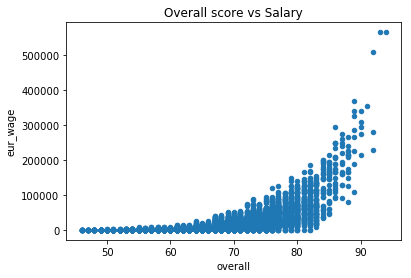

In [6]:
import matplotlib.pyplot as plt

%matplotlib inline
df.plot(x='overall', y='eur_wage', kind='scatter', title="Overall score vs Salary")

From the plot above, we see the quadratic polynomial correlation. We try to use Polynomial Regression of degree 2.

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import confusion_matrix
from sklearn import linear_model

In [8]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data,test_size=0.2,random_state=42)

In [9]:
X_train = train_set.drop('eur_wage',axis=1)
y_train = train_set['eur_wage']
X_test = test_set.drop('eur_wage',axis=1)
y_test = test_set['eur_wage']

In [10]:
# try to use quadratic regression to predict salary base on "overall" feature.
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
poly_features = PolynomialFeatures(degree=2, include_bias=False)

X = []
for x in X_train['overall']:
    X.append([x])
X_poly = poly_features.fit_transform(X)
lg = Ridge(alpha = 1.)
lg.fit(X_poly,y_train)
lg.intercept_, lg.coef_


(604099.51418129122, array([-20078.82675524,    166.24742114]))

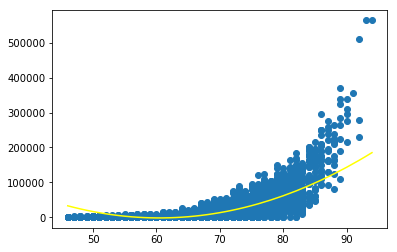

In [11]:
def graph(formula, x_range):  
    x = np.array(x_range)  
    y = formula(x)  # <- note now we're calling the function 'formula' with x
    plt.plot(x, y)  
    plt.show()  

def my_formula(x):
    return 166.4845645 * x**2-20130.4490982*x+606317.75890766515

plt.scatter(data['overall'],data['eur_wage'])
yfit = [my_formula(xi) for xi in data['overall']]
plt.plot(data['overall'],yfit,color="yellow")
plt.show()

In [12]:
X_test_ = []
for x in X_test['overall']:
    X_test_.append([x])
X_test_poly = poly_features.fit_transform(X_test_)   
prediction = lg.predict(X_test_poly)
remove = (prediction - y_test)*100/y_test
remove

14575   -206.968752
12254   -134.351897
12339   -134.351897
11848    -99.798059
13636   -273.265779
17218    362.034944
8522     -63.551464
7634       6.676717
15930   -140.537097
12867   -125.763923
11247    -99.865373
12139   -203.055690
15583   -284.399140
8385     -14.953416
11767    -99.798059
10185    -54.295687
8287       2.055901
4164     136.515207
3328     575.020633
13379   -186.632890
7237     148.912339
7872      70.093169
14969   -153.484376
13263   -186.632890
13149   -273.265779
7599     -25.326298
6585     -69.198666
916      297.371036
14676   -313.937504
3549     -34.675423
            ...    
3400     153.132737
1153     118.554070
7721     -71.651139
2773      15.607944
16595      3.712857
9343       2.357160
13039   -273.265779
8925      53.535741
15569   -146.099785
5078     119.900081
4170     -21.161598
4291     106.950806
1216     -23.292429
135       -4.786922
3557     125.006878
15943   -160.805646
16936     33.124579
14153   -205.113192
16395   -125.573959


We try to use Linear Regression to detemine the salary base on the basic features Pace, Shot, Pass, Drift, Defense, Physical. 

In [13]:
lin_reg = LinearRegression()
X = X_train[['potential','pac','sho','pas','dri','phy']]
lin_reg.fit(X,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
import numpy as np
prediction = lin_reg.predict(X_test[['potential','pac','sho','pas','dri','phy']])

#remove "remove" this one when finish.
remove = (prediction - y_test)*100/y_test

# Only get right answer 220/3556
remove[np.abs(remove)<10].count()

210

It is clear that Linear Regression using only Pace, Shot, Pass, Drift, Defense, Physical features is not sufficient to correctly determining salary value.

In [15]:
under_20000 = data[data['eur_wage']<= 20000]
find = under_20000[under_20000['overall']>80]
find

,name,full_name,club,age,league,birth_date,height_cm,weight_kg,body_type,nationality,eur_value,eur_wage,eur_release_clause,overall,potential,pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,work_rate_att,...,prefers_rw,prefers_rf,prefers_ram,prefers_rcm,prefers_rm,prefers_rdm,prefers_rcb,prefers_rb,prefers_rwb,prefers_st,prefers_lw,prefers_cf,prefers_cam,prefers_cm,prefers_lm,prefers_cdm,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb
147,Danilo Pereira,Danilo Luís Hélio Pereira,FC Porto,25,Portuguese Primeira Liga,1991-09-09,188.0,83.0,Normal,Portugal,27500000.0,18000.0,57100000.0,83,86,68,62,69,74,82,87,3,2,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0
169,S. Giovinco,Sebastian Giovinco,Toronto FC,30,USA Major League Soccer,1987-01-26,163.0,61.0,Normal,Italy,25000000.0,15000.0,37500000.0,83,83,84,81,79,87,27,57,2,4,4,3,...,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
175,Rui Patrício,Rui Pedro dos Santos Patrício,Sporting CP,29,Portuguese Primeira Liga,1988-02-15,190.0,84.0,Normal,Portugal,17500000.0,19000.0,35000000.0,83,83,85,81,80,82,55,79,3,1,2,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
188,Diego López,Diego López Rodríguez,RCD Espanyol,35,Spanish Primera División,1981-11-03,196.0,89.0,Lean,Spain,6000000.0,19000.0,12600000.0,83,83,77,84,76,80,44,83,3,1,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
197,Casillas,Iker Casillas Fernández,FC Porto,36,Portuguese Primeira Liga,1981-05-20,185.0,84.0,Normal,Spain,3500000.0,10000.0,7000000.0,83,83,86,74,58,85,58,80,4,1,2,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
213,Felipe,Felipe Augusto de Almeida Monteiro,FC Porto,28,Portuguese Primeira Liga,1989-05-16,185.0,77.0,Normal,Brazil,18000000.0,20000.0,36000000.0,82,82,68,41,59,61,83,81,3,2,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
217,Sergio Rico,Sergio Rico González,Sevilla FC,23,Spanish Primera División,1993-09-01,194.0,88.0,Lean,Spain,21500000.0,16000.0,46800000.0,82,87,79,80,78,83,52,82,2,1,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
237,Pizzi,Luis Miguel Afonso Fernandes,SL Benfica,27,Portuguese Primeira Liga,1989-10-06,177.0,72.0,Lean,Portugal,23000000.0,19000.0,46000000.0,82,82,79,77,81,83,61,69,3,4,4,3,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
249,Taison,Taison Barcellos Freda,Shakhtar Donetsk,29,Ukrainian Premier League,1988-01-13,172.0,64.0,Normal,Brazil,21500000.0,1000.0,45200000.0,82,82,92,79,75,86,47,63,2,4,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
250,Marlos,Marlos Romero Bonfim,Shakhtar Donetsk,29,Ukrainian Premier League,1988-06-07,174.0,69.0,Normal,Ukraine,21500000.0,1000.0,45200000.0,82,82,83,76,78,87,48,66,2,5,3,2,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
